In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os

## Initialize Hyperparameters

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 5
BS = 8

## Load and Preprocess data

In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/drive/MyDrive/dataset/"))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
print("[INFO] loading complete")

[INFO] loading images...
[INFO] loading complete


## Data Encoding, Train/Test split and Data Augmentation

In [ ]:
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

In [ ]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

## Applied Data Augmentation Preview   

In [ ]:
os.mkdir('preview')
x = trainX[0]
x = x.reshape((1,) + x.shape)

i = 0
for batch in trainAug.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break

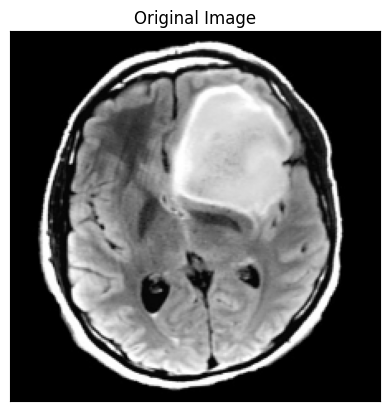

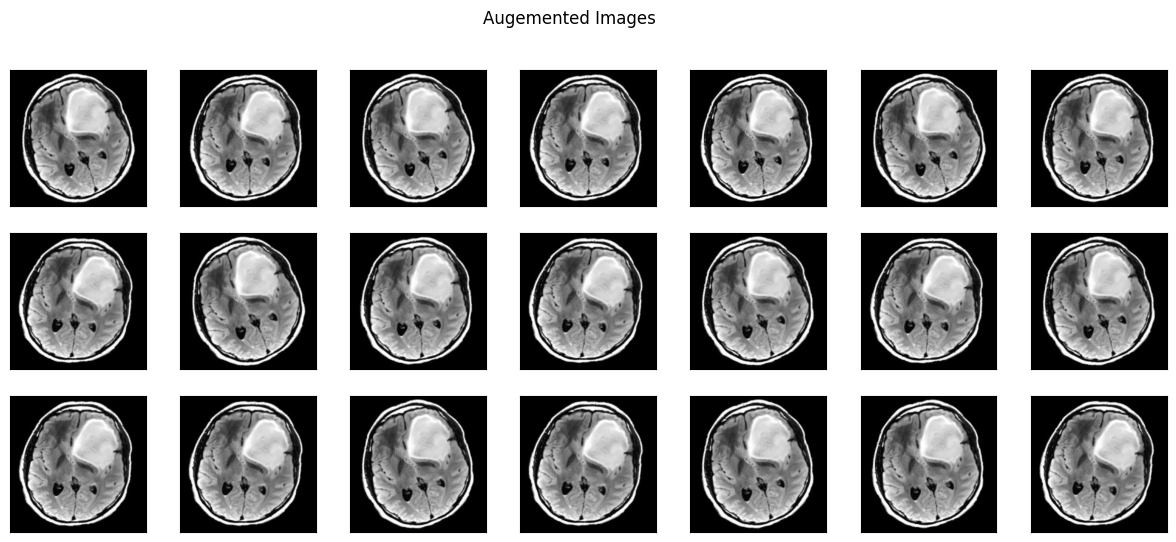

In [ ]:
plt.imshow(trainX[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [ ]:
#The rm command has a powerful option, -R (or -r ), otherwise known as the recursive option. When you run the rm -R command
#on a folder, you're telling Terminal to delete that folder, any files it contains, any sub-folders it contains,
#and any files or folders in those sub-folders, all the way down.
#!rm -rf preview/  # Uncomment '#!rm -rf preview/' to delete preview folder

## Data Sample View

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Brain: {}'.format(labels_dict[index]))
        plt.show()

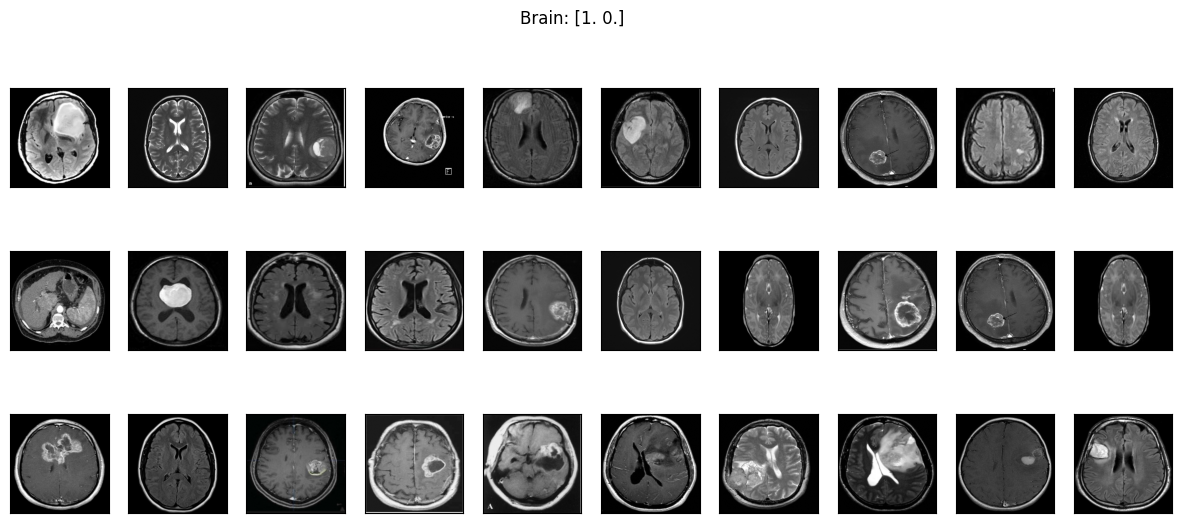

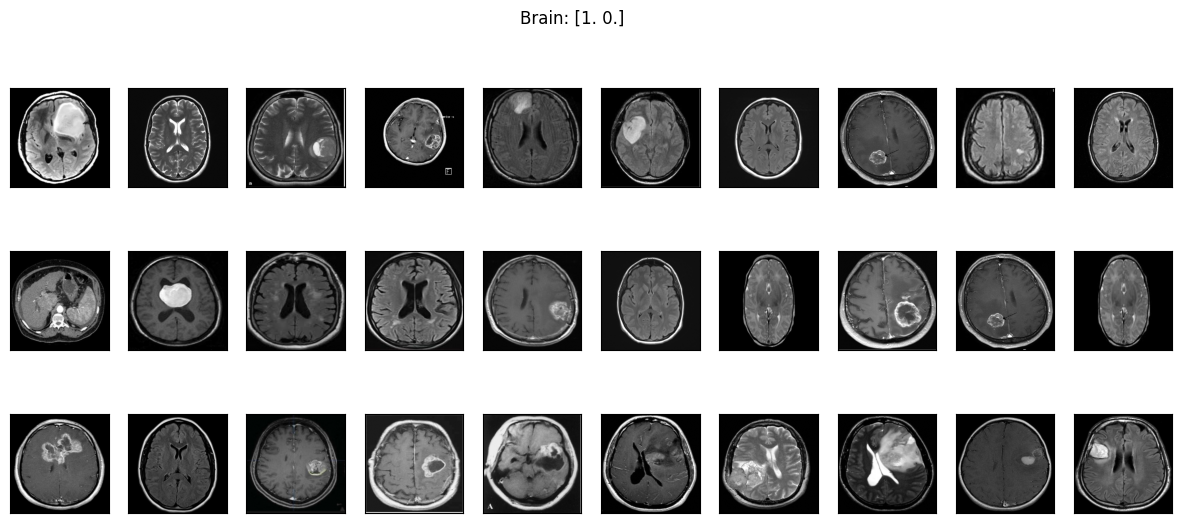

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [ ]:
plot_samples(trainX, trainY,labels, 30)

## Fine-tuning and Model Build

In [ ]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


## Compile and fit Model

In [ ]:
# compile our model
print("[INFO] compiling model...")
from tensorflow.keras.optimizers import Adam

# compile your model

opt = Adam(learning_rate=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)
print("[INFO] training complete.")

[INFO] compiling model...
[INFO] training head...
Epoch 1/5


<ipython-input-12-a22eb79a8016>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


24/24 [==============================] - 177s 7s/step - loss: 0.6829 - accuracy: 0.6277 - val_loss: 0.6445 - val_accuracy: 0.6122
Epoch 2/5
24/24 [==============================] - 161s 7s/step - loss: 0.6759 - accuracy: 0.5851 - val_loss: 0.6274 - val_accuracy: 0.6122
Epoch 3/5
24/24 [==============================] - 162s 7s/step - loss: 0.6259 - accuracy: 0.6649 - val_loss: 0.6082 - val_accuracy: 0.6531
Epoch 4/5
24/24 [==============================] - 161s 7s/step - loss: 0.6216 - accuracy: 0.6489 - val_loss: 0.5954 - val_accuracy: 0.6939
Epoch 5/5
24/24 [==============================] - 164s 7s/step - loss: 0.6146 - accuracy: 0.6862 - val_loss: 0.5843 - val_accuracy: 0.6735
[INFO] training complete.


## Model Evaluate

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=lb.classes_))

[INFO] evaluating network...
7/7 [==============================] - 34s 4s/step
              precision    recall  f1-score   support

      Normal       1.00      0.16      0.27        19
       Tumor       0.65      1.00      0.79        30

    accuracy                           0.67        49
   macro avg       0.83      0.58      0.53        49
weighted avg       0.79      0.67      0.59        49



## Confusion Matrix for Statistical Evaluation

In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs) # use axis = 0 in the next model
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) # Switch sensitivity and specificity
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) # In the calculations
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 3 16]
 [ 0 30]]
acc: 0.6735
sensitivity: 0.1579
specificity: 1.0000


## Model Plot

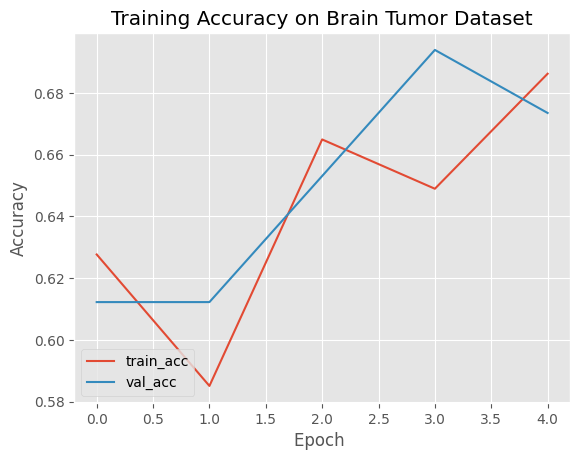

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy on Brain Tumor Dataset")
plt.xlabel("Epoch ")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("BrainTumor.png")

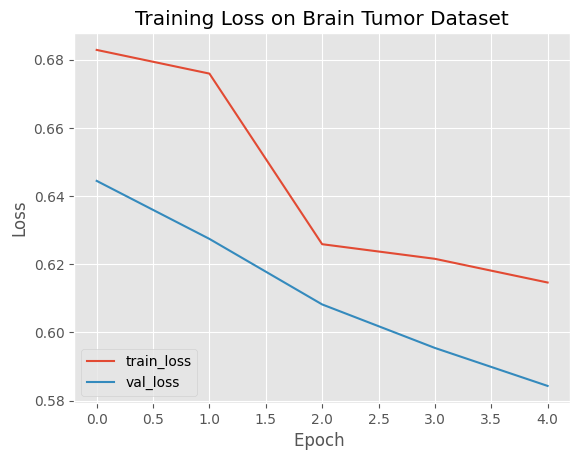

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss on Brain Tumor Dataset")
plt.xlabel("Epoch ")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("BrainTumor.png")

## Model Save

In [ ]:
# serialize the model to disk
print("[INFO] saving Brain Tumor detector model...")
model.save('BrainTumor', save_format="h5")

[INFO] saving Brain Tumor detector model...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# serialize the label binarizer to disk
print("[INFO] serializing labels...")
f = open('lb.BTpickle', "wb")
f.write(pickle.dumps(lb))
f.close()
print("[INFO] serialization complete.")

[INFO] serializing labels...
[INFO] serialization complete.


In [ ]:
trainX_flatten = trainX.reshape(trainX.shape[0], -1)
testX_flatten = testX.reshape(testX.shape[0], -1)

In [ ]:
print("Shape of trainX:", trainX_flatten.shape)
print("Shape of trainY:", trainY.shape)

Shape of trainX: (196, 150528)
Shape of trainY: (196, 2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(trainX_flatten, trainY)
y_pred = knnclassifier.predict(testX_flatten)

In [ ]:
print('Accuracy of training set : {:.2f}'.format(knnclassifier.score(trainX_flatten, trainY)))
print('Accuracy of  test set    : {:.2f}'.format(knnclassifier.score(testX_flatten, testY)))

print("Classification report for classifier %s:\n%s\n" % (knnclassifier,classification_report(testY, y_pred)))
nb_score = knnclassifier.score(testX_flatten, testY)
#nb_cm = confusion_matrix(testY, y_pred)



Accuracy of training set : 0.80
Accuracy of  test set    : 0.67
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.56      0.79      0.65        19
           1       0.82      0.60      0.69        30

   micro avg       0.67      0.67      0.67        49
   macro avg       0.69      0.69      0.67        49
weighted avg       0.72      0.67      0.68        49
 samples avg       0.67      0.67      0.67        49




None


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(trainX_flatten, trainY)
y_pred_test = dtclassifier.predict(testX_flatten)
y_pred_train = dtclassifier.predict(trainX_flatten)

In [ ]:
print('Accuracy of training set : {:.2f}'.format(dtclassifier.score(trainX_flatten, trainY)))
dt=print('Accuracy of  test set    : {:.2f}'.format(dtclassifier.score(testX_flatten, testY)))
print("Classification report for classifier %s:\n%s\n" % (dtclassifier,classification_report(testY, y_pred)))
nb_score = dtclassifier.score(testX_flatten, testY)

Accuracy of training set : 0.99
Accuracy of  test set    : 0.73
Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0):
              precision    recall  f1-score   support

           0       0.56      0.79      0.65        19
           1       0.82      0.60      0.69        30

   micro avg       0.67      0.67      0.67        49
   macro avg       0.69      0.69      0.67        49
weighted avg       0.72      0.67      0.68        49
 samples avg       0.67      0.67      0.67        49




In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(trainX_flatten, trainY)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [ ]:
y_pred_train = rf_clf.predict(trainX_flatten)
y_pred_test = rf_clf.predict(testX_flatten)
print('Accuracy of training set : {:.2f}'.format(rf_clf.score(trainX_flatten, trainY)))
random=print('Accuracy of  test set    : {:.2f}'.format(rf_clf.score(testX_flatten, testY)))
print("Classification report for classifier %s:\n%s\n" % (rf_clf,classification_report(testY, y_pred)))
nb_score = rf_clf.score(testX_flatten, testY)



Accuracy of training set : 1.00
Accuracy of  test set    : 0.82
Classification report for classifier RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300):
              precision    recall  f1-score   support

           0       0.56      0.79      0.65        19
           1       0.82      0.60      0.69        30

   micro avg       0.67      0.67      0.67        49
   macro avg       0.69      0.69      0.67        49
weighted avg       0.72      0.67      0.68        49
 samples avg       0.67      0.67      0.67        49




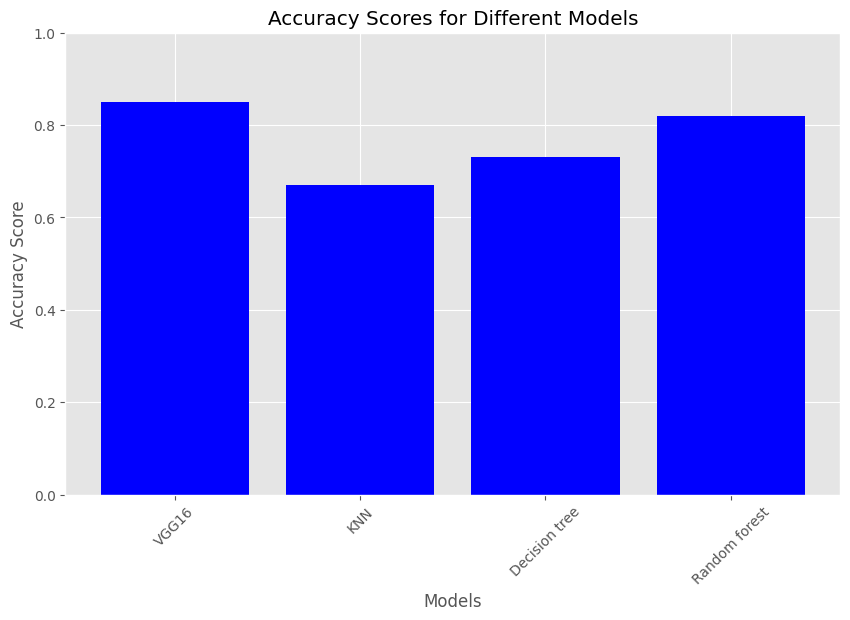

In [ ]:
models = ['VGG16','KNN', 'Decision tree', 'Random forest']  # Removed 'Kernalized SVC'
accuracy_scores = [0.85,0.67,0.73,0.82]

# Create a bar chart for model accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1.0)  # Set the y-axis limits to the range [0, 1]
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [ ]:
ind_list = np.argwhere(testY != y_pred_train).flatten()
if ind_list.size == 0:
    print('There are no missclassified images.')
else:
    for i in ind_list:
        plt.figure()
        plt.imshow(testX[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Actual class: {testY[i]}\nPredicted class: {y_pred_train[i]}')
        plt.show()

There are no missclassified images.


<ipython-input-27-9fac80abc373>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ind_list = np.argwhere(testY != y_pred_train).flatten()


In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
loaded_model = load_model('/content/my_model.h5')

In [ ]:


# Load and preprocess the input image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Load and preprocess the input image
img_path = '/content/drive/MyDrive/dataset/Normal/no.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
def decode_binary_predictions(predicted_class_label):
    # Assuming class 0 is the negative class and class 1 is the positive class
    class_labels = ['Tumor', 'Normal']

    # Get the corresponding class label
    decoded_prediction = class_labels[predicted_class_label]

    return decoded_prediction

# Assuming you have the predicted class label
predicted_class_label = 1  # Replace this with the actual predicted class label

# Decode and print predictions
decoded_prediction = decode_binary_predictions(predicted_class_label)
print('Predicted Class:', decoded_prediction)

Predicted Class: Normal


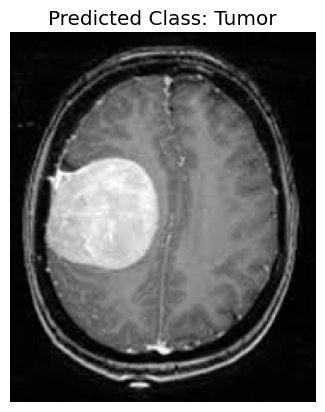

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

def load_and_display_image(img_path, predicted_class_label):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(299, 299))  # Adjust the target size as needed
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)

    # Display the image
    plt.imshow(mpimg.imread(img_path))
    plt.title(f'Predicted Class: {predicted_class_label}')
    plt.axis('off')
    plt.show()

# Assuming you have the predicted class label and the original image file path
predicted_class_label = 'Tumor'  # Replace this with the actual predicted class label
img_path = '/content/drive/MyDrive/dataset/Tumor/Y1.jpg'  # Replace this with the actual image file path

# Load and display the image with the predicted class label
load_and_display_image(img_path, predicted_class_label)